In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
train_df = pd.concat([
    pd.read_csv("labeled_phone_ratings_sure.csv"),
    pd.read_csv("labelling_data_part1.csv"),
    pd.read_csv("labelling_data_part2.csv"),
])


In [3]:
train_df.shape

(2280, 7)

In [4]:
train_df["product_id"].unique()

array(['honor-x8b', 'iphone-12', 'iphone-13', 'iphone-14',
       'iphone-15-plus', 'iphone-15-pro-max', 'iphone-15',
       'iphone-16-pro-max', 'masstel-izi-10', 'masstel-izi-t6',
       'mobell-f209', 'mobell-f309', 'mobell-m239', 'mobell-m331',
       'mobell-m539', 'nokia-105-4g-pro', 'nokia-110-4g-pro',
       'nokia-220-4g', 'oppo-a3-8gb-128gb', 'oppo-a38-6gb',
       'oppo-a3x-4gb-64gb', 'oppo-a58-4g', 'oppo-a60-128gb',
       'oppo-reno12-5g-12gb-512gb', 'oppo-reno12-f-5g-12gb-256gb',
       'oppo-reno13-f-5g', 'realme-note-50-64gb',
       'samsung-galaxy-a05s-6gb', 'samsung-galaxy-a25-8gb',
       'samsung-galaxy-a35-5g', 'samsung-galaxy-a55-5g',
       'samsung-galaxy-m15', 'samsung-galaxy-m35-5g',
       'samsung-galaxy-s24-256gb-5g', 'samsung-galaxy-s24-ultra-5g',
       'samsung-galaxy-z-fold6', 'tecno-spark-go-1', 'vivo-y28',
       'xiaomi-14t-5g', 'xiaomi-14t-pro-5g-12gb-256gb',
       'xiaomi-redmi-13-6gb-128gb', 'xiaomi-redmi-a3',
       'xiaomi-redmi-note-13'], dty

In [5]:
train_df.head()

,product_id,comment,comment_clean_stage1,comment_clean_stage2,rating,positive,negative
0,honor-x8b,"Đừng mua, ko có linh kiện.","đừng mua, không có linh kiện.",đừng mua không linh_kiện,1,0,1
1,honor-x8b,Mua online bên này báo ngoài ip ra thì hàng ko...,mua online bên này báo ngoài iphone ra thì hàn...,mua online bên báo iphone hàng không full box ...,2,0,1
2,honor-x8b,"Mạng yếu hay mất sóng, đổi máy khác được không","mạng yếu hay mất sóng, đổi máy khác được không?",mạng yếu hay mất sóng đổi máy khác được không,1,0,1
3,iphone-12,"Mua máy lướt được 2 hôm đã lỗi loa ngoài, lúc ...","mua máy lướt được hai hôm đã lỗi loa ngoài, lú...",mua máy lướt được hai hôm lỗi loa lúc bán nhân...,1,0,1
4,iphone-12,Mới mua mà dễ nóng quá. Khi sạc và nhất là bật...,mới mua mà dễ nóng quá. khi sạc và nhất là bật...,mới mua mà dễ nóng quá sạc nhất_là bật máy_ảnh...,2,0,1


In [6]:
def plot_ratings_distribution(df, title):
    # Nhóm theo (positive, negative) và đếm số lượng
    counts = df.groupby(['positive', 'negative']).size().reset_index(name='count')

    # Tạo nhãn để hiển thị trên trục x
    counts['label'] = counts.apply(lambda row: f"Positive:{row['positive']}, Negative:{row['negative']}", axis=1)

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    bars = plt.bar(counts['label'], counts['count'], color='skyblue')

    # Thêm số lượng trên đầu mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

    # Thiết lập trục và tiêu đề
    plt.xlabel('Positive / Negative Label')
    plt.ylabel('Số mẫu')
    plt.title(title)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

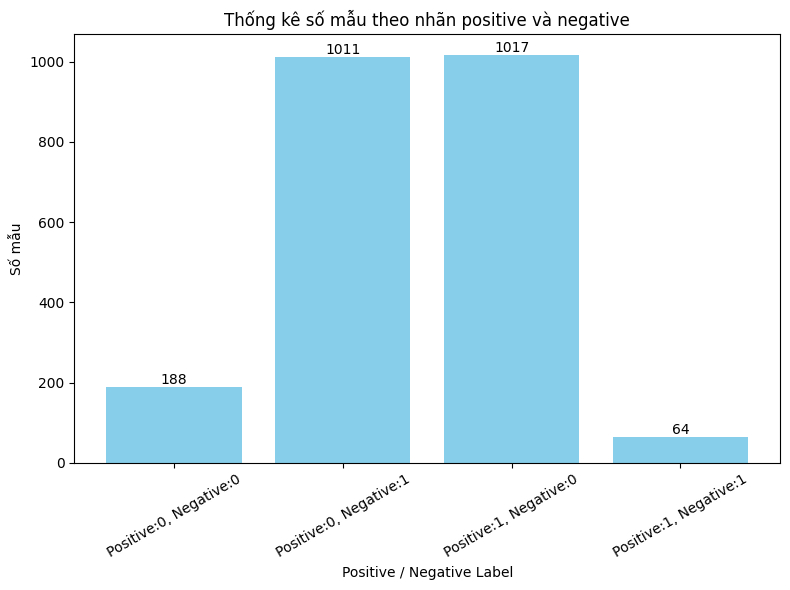

In [7]:
plot_ratings_distribution(train_df, "Thống kê số mẫu theo nhãn positive và negative")

In [ ]:
os.mkdir("../training_data")

In [ ]:
# train_df.to_csv("../training_data/train_data.csv", index=False)

### Thống kê dữ liệu sau khi cân bằng

In [8]:
generated_data = pd.read_csv("../training_data/generated_data.csv")

In [9]:
train_df = pd.concat([
    train_df,
    generated_data
]).reset_index(drop=True)

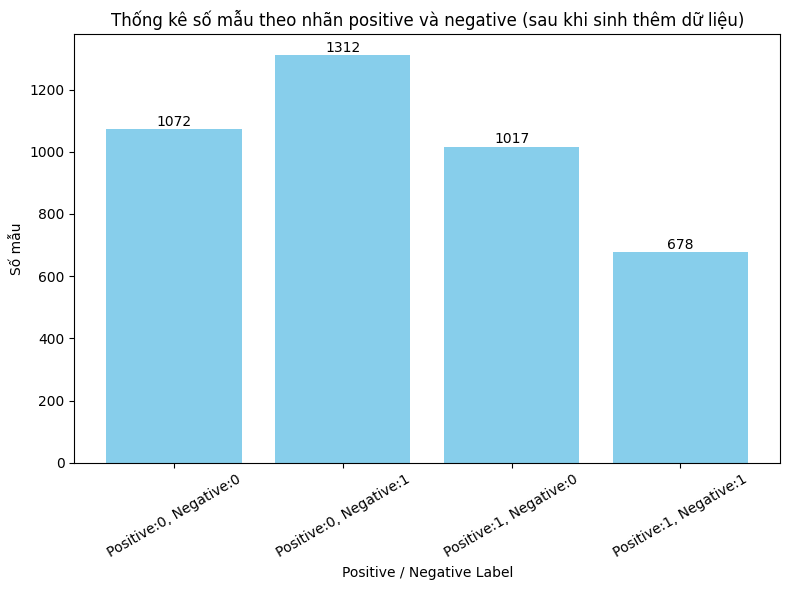

In [11]:
plot_ratings_distribution(train_df, "Thống kê số mẫu theo nhãn positive và negative (sau khi sinh thêm dữ liệu)")